# <h1><center>**INVERSE MODELING**</center></h1>

### Abstract

<div style="text-align: justify">Inverse modeling is a commonly used method and a formal approach to estimate the variables driving the evolution of a system, e.g. greenhouse gases (GHG) sources and sinks, based on the observable manifestations of that system, e.g. GHG concentrations in the atmosphere. This has been developed and applied for decades and it covers a wide range of techniques and mathematical approaches as well as topics in the field of the biogeochemistry. In this Jupyter Notebook is a lecture for students interested in learning about inverse modeling. It contains all the theoretical background around the concept of inverse modeling from a beginners level. At the end of the notebook you can find an application of inverse modeling to retrieve sourface fluxes of $CO_2$.</div>

### Content

1. [Introduction](#Section_1)<br>
2. [Bayes' theorem](#Section_2)<br>
3. [Vector-matrix tools for inverse modeling](#Section_3)<br>
   3.1. [Error covariance matrices](#Section_3.1)<br>
   3.2. [Gaussian probability distribution functions for vectors](#Section_3.2)<br>
    3.2. [Jacobian matrix](#Section_3.3)<br>
4. [Inverse problem for vectors](#Section_4)<br>
    4.1. [Analytical maximum *a posteriori* (MAP) solution](#Section_4.1)<br>
5. [Example of application](#Section_5)<br>
    5.1. [Importing packages](#Section_5.1)<br>
    5.2. [Importing and formating datasets](#Section_5.2)<br>
    5.3. [Setting errors](#Section_5.3)<br>
    5.4. [Plotting the results](#Section_5.4)<br>
6. [References](#Section_6)<br>


### 1. Introduction <a class="anchor" id="Section_1"></a>

<div style="text-align: justify">Inverse modeling is a formal approach for estimating the variables driving the evolution of a system by taking measurements of the observable manifestations of that system, and using our physical understanding to relate these observations to the driving variables. We call the variables that we wish to estimate the <i>target variables</i>, and assemble them into a <i>control vector</i> $x$. We similarly assemble the observations into an <i>observation vector</i> $y$. Our understanding of the relationship between $x$ and $y$ is described by a physical model $F$, called the forward model:</div>

<h5><center>$y=F(x,z)+\varepsilon$ (1.1) <a class="anchor" id="Eq_1"></a></center></h5> 

<div style="text-align: justify"> where $z$ is a parameter vector including all model variables that we do not seek to optimize (we call them <i>model state variables</i>), and $\varepsilon$ is an error vector including contributions from errors in the observations, in the forward model, and in the model parameters. From inversion of <a href="#Eq_1">Eq. 1.1</a>, we can obtain $x$ given $y$. In the presence of error ($\varepsilon\neq0$), the best that we can achieve is a statistical estimate, and we need to weigh the resulting information against our prior (<i>a priori</i>) knowledge $x^b$ of the control vector before the observations were made. The optimal solution of $x$ reflecting this ensemble of constraints is called the <i>a posteriori</i>, the optimal estimate, or the retrieval. The choice of control vector (i.e., which variables to include in $x$ vs. in $z$) depends on what variables we wish to optimize, what information is contained in the observations, and what computational costs are associated with the inversion.</div>

<div style="text-align: justify">Inverse models have three major applications in biogeochemistry: </div>

<ul>
  <li>Retrieval of atmospheric concentrations from observed radiances, e.g. using nadir spectra measured from space to retrieve the vertical profile of a trace gas.</li>
  <li>Optimal estimation of surface fluxes, e.g. quantifying surface fluxes of a gas on a (latitude x longitude x time) grid.</li>
  <li>Data assimilation, e.g. constructing a continuous 3-D field of concentrations of a trace gas over the globe on the basis of limited measurements of concentrations at isolated points and scattered times.</li>
</ul> 

<div style="text-align: justify">Proper consideration of errors is crucial in inverse modeling. To appreciate this, let us examine what happens if we ignore errors. We linearize the forward model $y = F(x, z)$ around the a priori estimate $x^b$ taken as first guess: </div>

<h5><center>$y=F(x^b,z)+K(x-x^b)$ (1.2) </center></h5>

<div style="text-align: justify">where $K = \partial y / \partial x$ is the <i>Jacobian matrix</i> of the forward model with elements $k_{ij} = \partial y_i / \partial x_j$ evaluated at $x = x^b$. Let <i>n</i> and <i>m</i> be the dimensions of $x$ and $y$, respectively. In the absence of error, $m = n$ independent measurements constrain $x$ uniquely. The Jacobian matrix is then a $n * n$ matrix of full rank and hence invertible. We obtain for $x$:</div>

<h5><center>$x = x^b + K^{-1}(y-F(x^b,z))$ (1.3) <a class="anchor" id="Eq_3"></a></center></center></h5>

<div style="text-align: justify">If $F$ is nonlinear, the solution of <a href="#Eq_3">Eq. 1.3</a> must be iterated with recalculation of the Jacobian around successive guesses for $x$ until satisfactory convergence is achieved. Now, what happens if we make additional observations, such that $m > n$? In the absence of error these observations must necessarily be redundant. However, we know from experience that useful constraints on an atmospheric system typically require a very large number of measurements, $m >> n$. This reflects errors in the observations and in the forward model, described by the error vector $\varepsilon$ in equation <a href="#Eq_1">Eq. 1.1</a>. Thus equation <a href="#Eq_3">Eq. 1.3</a> is not applicable in practice; successful inversion requires adequate characterization of the error and consideration of <i>a priori</i> information on $x$. The <i>a priori</i> estimate has its own error: 
</div>

<h5><center>$x^b = x + \varepsilon^b$ (1.4)</center></h5>

<div style="text-align: justify">and the inverse problem then involves weighting the error statistics of $\varepsilon$ and $\varepsilon^b$ to solve the optimal estimation problem, “what is the best estimate of $x$ given $y$?”. This is done using Bayes’ theorem, presented below. </div>

### 2. Bayes' theorem <a class="anchor" id="Section_2"></a>

<div style="text-align: justify">Bayes’ theorem provides the general foundation for inverse models. Consider a pair of vectors $x$ and $y$. Let $P(x)$, $P(y)$, $P(x,y)$ represent the corresponding probability distribution functions (<i>pdfs</i>), so that the probability of $x$ being in the range $[x, x+dx]$ is $P(x)dx$, the probability of y being in the range $[y, y+dy]$ is $P(y)dy$, and the probability of $(x, y)$ being in the range $[x, x+dx, y, y+dy]$ is $P(x,y)dxdy$. Let $P(y|x)$ represent the pdf of $y$ when $x$ is assigned to a certain value. We can write $P(x,y)dxdy$ equivalently as:</div>

<h5><center>$P(x,y)dxdy= P(x)dxP(y|x)dy$ (2.1)</center></h5>

<div style="text-align: justify">or as:</div>

<h5><center>$P(x,y)dxdy= P(y)dyP(x|y)dx$ (2.2)</center></h5>

<div style="text-align: justify">Eliminating $P(x,y)$, we obtain Bayes’ theorem:</div>

<h5><center>$P(x|y) = \frac{P(y|x)P(x)}{P(y)}$ (2.3)<a class="anchor" id="Eq_4"></a></center></h5>
<p>
<div style="text-align: justify">This theorem formalizes the inverse problem posed in <a href="#Section_1">section 1</a>. Here $P(x)$ is the pdf of the control vector $x$ before the measurements are made (that is, the a priori pdf). $P(y|x)$ is the pdf of the observation vector $y$ given the true value for $x$, which the instrument knows about. $P(x|y)$ is the <i>a posteriori</i> pdf for the control vector reflecting the information from the measurements – that is, it is the pdf of $x$ given the measurements $y$. The optimal or <i>maximum a posteriori</i> (MAP) solution for $x$ is given by the maximum of $P(x|y)$, that is, the solution to $\nabla_xP(x|y)=0$ where $\nabla_x$ is the the gradient operator in the control vector space. The probability function $P(y)$ in the denominator of <a href="#Eq_4">Eq. 2.3</a> is independent of $x$, and we can view it merely as a normalizing factor to ensure that $\int_{0}^{\infty} P(x|y) \,dx=1$. It plays no role in determining the MAP solution (since it is independent of $x$) and we ignore it in what follows.
</div>
</p>
<p>
<div style="text-align: justify">
The case for one target variable and one observation is described in <a href="#Figure_1">Fig. 1</a>, slightly adapted from Rayner (2010). <a href="#Figure_1">Figure 1a</a> shows the joint probability distribution for the target variable (blue rectangle) and the measured quantity (red rectangle). Our imperfect knowledge of the mapping between them is shown by the green rectangle. In this simple case the three PDFs are uniform, meaning all values within the interval are equally likely. The solution of the problem is the intersection or multiplication of the three PDFs. Adding the requirement that the system state must take a value, we obtain the solution (panel b) by projecting the joint PDF onto the x axis and normalising it.
</div>
</p>
<h5>
<a class="navbar-brand" id="Figure_1">
    <center>
<img src="Bayes'.png" width="250"/>
    </center>
</a>
    <center>
        Figure 1. Illustration of Bayesian inference for a system with one target variable and one observation. Figure taken from Rayner <i>et al.</i> (2019).
    </center>
</h5>

### 3. Vector-matrix tools for inverse modeling <a class="anchor" id="Section_3"></a>

<div style="text-align: justify">Let us now consider the problem of a control vector $x$ of dimension $n$ with <i>a priori</i> value $x^b$ for which we seek an improved estimate on the basis of an ensemble of observations assembled into an observation vector $y$ of dimension $m$. The forward model is as in <a href="#Eq_1">Eq. 1.1</a>. Inverse analysis requires definition of error statistics and pdfs for vectors, and of the Jacobian matrix for the forward model. The error statistics are provided by <i>error covariance matrices</i>, and the pdfs are constructed in a manner that accounts for covariance between vector elements. Numerical construction of the Jacobian matrix may be done using either the forward model or its <i>adjoint</i>. We begin by describing these different objects before proceeding to the solution of the inverse problem in the following sections.</div>

#### 3.1. Error covariance matrices <a class="anchor" id="Section_3.1"></a>

<div style="text-align: justify">
The error covariance matrix for a vector is the analog of the variance for a scalar. Consider a vector $x = (x_1,…x_n)^T$ of dimension $n$. Its error covariance matrix $S$ has as diagonal elements the error variances of the individual elements of $x$, and as offdiagonal elements the error covariances between elements of $x$. Let us construct the <i>a priori</i> error covariance matrix $B$ of the control vector for the inversion. The <i>a priori</i> value for the control vector is $x^b$ and the true value is $x$. The error variance $\text{var}(x_i - x^{b}_{i})$ for element $x_i$ is defined as the expected value of $(x_i - x^{b}_{i})^2$ when $x_i$ is sampled over its <i>a priori</i> pdf $P(x_i)$. The error covariance $\text{cov}((x_i - x^{b}_{i}), (x_j - x^{b}_{j}))$ for the pair $(x_i, x_j)$ is defined as the expected value of the product $(x_i - x^{b}_{i})(x_j - x^{b}_{j})$ when $x_i$ and $x_j$ are sampled over their respective <i>a priori</i> pdfs. The matrix is thus constructed as:
</div>

<h5><center>
$
B = 
\begin{pmatrix}
\text{var}(x_1 - x^{b}_{1}) & \cdots & \text{cov}(x_1 - x^{b}_{1}, x_n - x^{b}_{n})\\
\vdots & \ddots & \vdots \\
\text{cov}(x_1 - x^{b}_{1}, x_n - x^{b}_{n}) & \cdots & \text{var}(x_n - x^{b}_{n})    
\end{pmatrix}
$ (3.1)
</center></h5>

<div style="text-align: justify">
We express it in compact mathematical form as $B = E[(x-x^b)(x-x^b)^T]$ where $E$ is the expected value operator returning the expected value of the quantity, i.e., its average value over a large number of determinations. Constructing an accurate error covariance matrix requires detailed statistical information and knowledge that is often difficult to obtain. Depending on the problem, simple estimates of errors may be sufficient. Let us now similarly construct the observational error covariance matrix $R$ of the observation error vector $\varepsilon$ in the forward model <a href="#Eq_1">Eq. 1.1</a> used to relate $x$ to $y$. $R$ is constructed as:
</div>

<h5><center>
$
R = 
\begin{pmatrix}
\text{var}(\varepsilon _1) & \cdots & \text{cov}(\varepsilon _1, \varepsilon_n)\\
\vdots & \ddots & \vdots \\
\text{cov}(\varepsilon _1, \varepsilon_n) & \cdots & \text{var}(\varepsilon _n)    
\end{pmatrix}
$ (3.2)
</center></h5>

<div style="text-align: justify">and we can express it in compact form as $R=E[\varepsilon \varepsilon ^T]$. Included in $\varepsilon$ are all the sources of error that would prevent the forward model from reproducing the observations. They can be separated into instrument errors ($\varepsilon _i$) and forward model errors ($\varepsilon _m$) as $\varepsilon=\varepsilon _i+\varepsilon _m$. The instrument errors can be determined from calibration standards. The forward model errors are more difficult to estimate. They include errors in the model representations of all processes not correctable through adjustment of the state vector. </div>

#### 3.2. Gaussian probability distribution functions for vectors 
 <a class="anchor" id="Section_3.2"></a>
 
<div style="text-align: justify">
Application of Bayes’ theorem <a href="#Section_2">(section 2)</a> requires formulation of probability distribution functions for vectors. We derive here the general Gaussian pdf for a vector $x$ of dimension $n$ with expected value $<x>$ and error covariance matrix $B$. If the errors on the individual elements of $x$ were uncorrelated (i.e., if $B$ were diagonal), then the pdf of the vector would simply be the product of the pdfs for the individual elements. This simple solution can be achieved by transforming $x$ to the basis of eigenvectors $e_i$ of $B$. The general pdf espression for vector $x$ is:
</div>

<h5><center> 
$P(x) = \frac{1}{(2\pi)^{n/2}|S|^{1/2}}\text{exp}[-\frac{1}{2}(x-<x>)^TS^{-1}(x-<x>)]$ (3.3)
</center></h5>

#### 3.3. Jacobian matrix <a class="anchor" id="Section_3.3"></a>

<p>
<div style="text-align: justify">
The Jacobian matrix is a linearization of the forward model that enables application of matrix algebra to the inverse problem. It represents the sensitivity of the observation variables $y$ to the target variables $x$, assembled in matrix form: 
</div>
</p>

<h5><center> 
$K=\nabla_xF=\frac{\partial y}{\partial x}$ (3.4)
</center></h5>

<p>
<div style="text-align: justify">
with individual elements $k_{ij}=\partial y_i/\partial x_j$. If the forward model is linear, then $K$ does not depend on $x$ and fully describes the forward model for the purpose of the inversion. If the forward model is not linear, then $K$ is a function of $x$ and represents a linearization of the forward model around $x$. It needs to be calculated initially for the <i>a priori</i> value $x^b$, representing the initial guess for $x$, and then re-calculated as needed for updated values of $x$, during iterative convergence to the solution. Depending on the degree of non-linearity, $K$ may not need to be re-calculated at each iteration.</div>
</p>

<p>
<div style="text-align: justify">Construction of the Jacobian matrix may be done analytically if the forward model is simple. If the forward model is complicated, such as a 3-D transport model, then the Jacobian must be constructed numerically. The standard approach, and the best to use if the dimension of the control vector is less than that of the observation vector $(n < m)$, is to build the Jacobian matrix column by column by successively perturbing the individual elements $x_i$ of the state vector by small increments $\Delta x_i$, and applying the forward model to obtain the resulting perturbation $\Delta y$. If the observations are sparse or the state vector is large so that $n > m$, then a more effective way to construct the Jacobian is through the model adjoint, which is beyond the scope of this document.
</div>
</p>

### 4. Inverse problem for vectors <a class="anchor" id="Section_4"></a>

<div style="text-align: justify">
The vector-matrix tools presented in <a href="#Section_3">section 3</a> allow us to apply Bayes’ theorem to obtain an optimal estimate of a control vector $x$ ($\text{dim} n$) on the basis of the observation vector $y$ ($\text{dim} y$), the <i>a priori</i> information $x^b$, the forward model $F$, and the error covariance matrix $B$. We need to linearize the forward model, if it is not already, in order to use matrix algebra. This is done by Taylor expansion about the <i>a priori</i> value as described by <a href="#Eq_2">Eq. 1.2</a>, where $K$ is the <a href="#Section_3.3">Jacobian matrix</a>. If the forward model is linear, $K$ is invariant with $x$. If it is not, then $K$ must be calculated initially for $x = x^b$ and re-calculated iteratively as the inversion progresses. In this chapter we assume that the forward model is linear or has been linearized so that $y = Kx+\varepsilon$, where $\varepsilon$ is the observational error vector previously introduced in <a href="#Section_1">section 1</a>.
</div>

#### 4.1. Analytical maximum *a posteriori* (MAP) solution <a class="anchor" id="Section_4.1"></a>

<div style="text-align: justify">
Folllowing the general pdf formulation for vectors <a href="#Section_3.2">(section 3.2)</a>, the pdfs from Bayes’ theorem in <a href="#Section_2">section 2</a> are given by:
</div>

<h5><center> 
$-2\text{ln}P(x)=(x-x^b)^TB^{-1}(x-x^b)+c_1$ (4.1)
</center></h5>

<h5><center> 
$-2\text{ln}P(y|x)=(y-Kx)^TR^{-1}(y-Kx)+c_2$ (4.2)
</center></h5>

<h5><center> 
$-2\text{ln}P(x|y)=(x-x^b)^TB^{-1}(x-x^b)+(y-Kx)^TR^{-1}(y-Kx)+c_3$ (4.3)
</center></h5>

<div style="text-align: justify">
where $c_1$, $c_2$, $c_3$ are constants. The maximum <i>a posteriori</i> (MAP) solution is the value of $x$ that yields the maximum of $P(x|y)$, or equivalently the minimum of the scalar-valued cost function $J(x)$:
</div>

<h5><center> 
$J(x)=(x-x^b)^TB^{-1}(x-x^b)+(y-Kx)^TR^{-1}(y-Kx)$ (4.4)
</center></h5>

<div style="text-align: justify">
To find this minimum, we solve for $\nabla_xJ(x)=0$:
</div>

<h5><center> 
$\nabla_xJ(x)=2B^{-1}(x-x^b)+2K^TR^{-1}(Kx-y)=0$ (4.5)
</center></h5>

<div style="text-align: justify">
The solution is straightforward and can be expressed in compact form as:
</div>

<h5><center> 
$\hat{x}=x^b+G(y-Kx^b)$ (4.6)
</center></h5>

<div style="text-align: justify">
with G given by:
</div>

<h5><center> 
$G=BK^T(KBK^T+R)^{-1}$ (4.7)
</center></h5>

### 5. Example of application <a class="anchor" id="Section_5"></a>

<p>
<div style="text-align: justify">
In this section we will perform an example of application for the retrieving of monthly land carbon cycle fluxes from atmospheric observations of $CO_2$ applying a global 2-box model, where each box represents an hemisphere of the earth as shown in <a href="#Figure_2">Fig. 2</a>. For this application case concentrations are the same everywhere and therefore are functions of time only. The objective is to try to represent the seasonal variation of the land carbon cycle using annual fluxes.
</div>
</p>

<h5>
<a class="navbar-brand" id="Figure_2">
    <center>
<img src="Picture1.png" width="500"/>
    </center>
</a>
    <center>
        Figure 2. 2-box model resolution and fluxes.
    </center>
</h5>

<p>
<div style="text-align: justify">
The $CO_2$ observations were obtained from two background stations which are not impacted directly from anthropogenic emissions so we can assume the portion of the atmosphere sampled is well-mixed and it is representative of the concentration in the whole hemisphere. For northern hemisphere we selected Mauna Loa (Hawaii, US) station, and for southern hemisphere, South Pole station, both from the <a href="https://www.esrl.noaa.gov/gmd/dv/data/">National Oceanic and Atmospheric Administration (NOAA)</a>. Total $CO_2$ fluxes where obtained from the <a href="https://www.icos-cp.eu/global-carbon-budget-2019">Global Carbon Budget</a> from 2019.
</div>
</p>

<p>
<div style="text-align: justify">
The 2-box model follows the next equations:
</div>
</p>

<h5><center> 
$\frac{\text{d}}{\text{d}t}C^{NH}=\tau*(-C^{NH}+C^{SH})+F_{bio}^{NH}+F_{oce}^{NH}+F_{fos}^{NH}$ (5.1)
</center></h5>

<h5><center> 
$\frac{\text{d}}{\text{d}t}C^{SH}=\tau*(C^{NH}-C^{SH})+F_{bio}^{SH}+F_{oce}^{SH}+F_{fos}^{SH}$ (5.2)
</center></h5>

<p>
<div style="text-align: justify">
where $C$ is the atmospheric burden of $CO_2$, $\tau$ is the interhemispheric exchange time constant, $F$ is the flux of $CO_2$ between the surface and the atmosphere, the subscripts $bio$, $oce$ and $fos$ represent the biogenic, oceanic and fossil fuel sources and the superscripts represent the hemisphere. 
</div>
</p>

<p>
<div style="text-align: justify">
Below you will find code cells that you can run with run buttom in the toolbar or by pressing <code>Ctrl+Enter</code> to run and stay in the cell or <code>Shift+Enter</code> to run and move to the next cell. In this section you will use the <code>inverter</code> package, a Python class to perform most of the common tasks related with inverse modeling. You can find more information about the package looking into the code or in its <a href="https://github.com/cdgomezo/radiocarbon_box_model">repository</a>. The package is intended to be highly modular and model independent, so you can use your own data and model following the data strutucture in the cells below. 
</div>
</p>

#### 5.1. Importing packages <a class="anchor" id="Section_5.1"></a>

<div style="text-align: justify">
In the cell below you will import the packages necessary to run the rest of the cells. This is why you need this packages:
<ul>
  <li><code>numpy</code> and its submodule <code>numpy.linalg</code> will be the main library to read, format and manipulate datasets as well as perform mathematic and linear algebra operations. </li>
  <li><code>matplotlib</code> will be the main library to plot the different results and datasets.</li>
  <li><code>copy</code> is used in the <code>inverter</code> package to copy the format of the datasets.</li>
  <li><code>matplotlib.dates</code>, <code>datetime</code> and <code>calendar</code> are used to format time parameter of fluxes and observations.</li>
  <li><code>inverter</code> is a Python class containing the functions to perform the inversions.</li>
  <li><code>modelCO2</code> contains the Python code of the transport model.</li>
</ul> 
</div>


In [1]:
from numpy import *
from numpy.linalg import *
from matplotlib.pyplot import *
from matplotlib.dates import *
from matplotlib.cbook import *
from copy import *
from datetime import *
from calendar import *

from inverter import Inverter
from modelCO2 import modelCO2

#### 5.2. Importing and formating datasets <a class="anchor" id="Section_5.2"></a>

<div style="text-align: justify">
In the cell below you will import and format the datasets corresponding to fluxes and observations into Python dictionaries as well as previsualize the datasets. The annual fluxes are distributed uniformly during the year.
</div>

In [2]:
fluxes = loadtxt('Emissions/Global_Carbon_Budget_2019v1.txt')
obs_nh = loadtxt('Observations/co2_mlo_surface-flask_1_ccgg_month.txt')
obs_sh = loadtxt('Observations/co2_spo_surface-flask_1_ccgg_month.txt')

fluxes_time = fluxes[:,0]
F_bio = fluxes[:,2] - fluxes[:,5]
F_oce = -1*fluxes[:,4]
F_fos = fluxes[:,1]

def formatTime(obs):
    
    obs_time = []
    for t in range(len(obs)):
        obs_time.append(date(*(int(obs[t,0]),int(obs[t,1]),1)))
        
    return array(obs_time)
    
obs_time_nh = formatTime(obs_nh)
obs_time_sh = formatTime(obs_sh)

def distFluxes(flux):
    
    fluxes = array(())
    monthly_flux = ones(12)
    for t in range(len(flux)):
        fluxes = append(fluxes, monthly_flux * flux[t]/12, axis = 0)
        
    return fluxes

F_bio_month = distFluxes(F_bio)
F_oce_month = distFluxes(F_oce)
F_fos_month = distFluxes(F_fos)

def timeFluxes(time_fluxes):
    
    time_f = array(())
    months = arange(1,13)
    for y in time_fluxes:
        for m in months:
            time_f = append(time_f, date(*(int(y),int(m),1)))
            
    return time_f

fluxes_time_month = timeFluxes(fluxes_time)

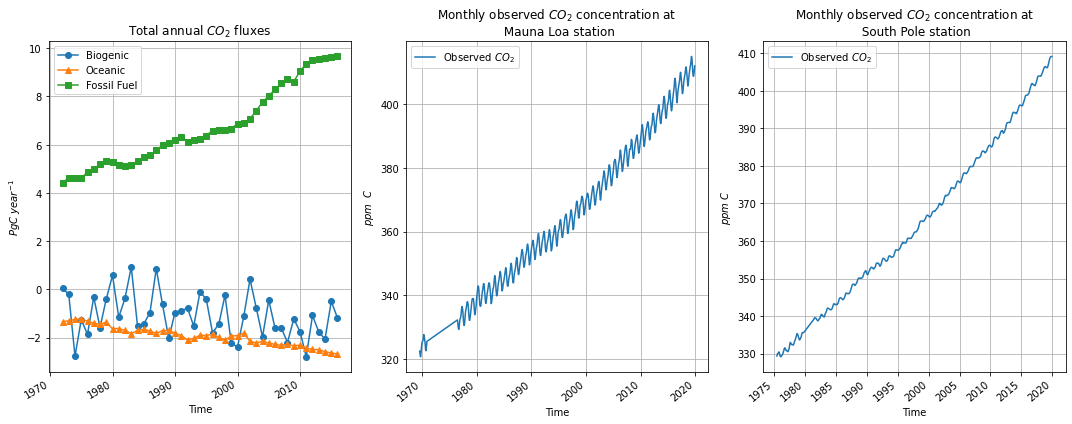

In [3]:
f, ax = subplots(1, 3, figsize=(15, 6))

f.autofmt_xdate()

ax_fluxes, ax_obs_nh, ax_obs_sh = ax

ax_fluxes.plot(fluxes_time, F_bio, marker='o')
ax_fluxes.plot(fluxes_time, F_oce, marker='^')
ax_fluxes.plot(fluxes_time, F_fos, marker='s')
ax_fluxes.set_ylabel('$PgC$ $year^{-1}$')
ax_fluxes.set_xlabel('Time')
ax_fluxes.legend(['Biogenic', 'Oceanic', 'Fossil Fuel'])
ax_fluxes.set_title('Total annual $CO_2$ fluxes')
ax_fluxes.grid()

ax_obs_nh.plot(obs_time_nh, obs_nh[:,2])
ax_obs_nh.set_ylabel('$ppm$  $C$')
ax_obs_nh.legend(['Observed $CO_2$'])
ax_obs_nh.set_xlabel('Time')
ax_obs_nh.set_title('Monthly observed $CO_2$ concentration at \n Mauna Loa station')
ax_obs_nh.grid()
ax_obs_nh.tick_params(axis='x', which='both', labelbottom=True, labelrotation=40)

ax_obs_sh.plot(obs_time_sh, obs_sh[:,2])
ax_obs_sh.set_ylabel('$ppm$ $C$')
ax_obs_sh.legend(['Observed $CO_2$'])
ax_obs_sh.set_xlabel('Time')
ax_obs_sh.set_title('Monthly observed $CO_2$ concentration at \n South Pole station')
ax_obs_sh.grid()
ax_obs_sh.tick_params(axis='x', which='both', labelbottom=True, labelrotation=40)

f.tight_layout()
f.show()

In [4]:
NH = 0.9
SH = 0.1

trueFluxesCO2 = {
    'units': 'gC month^-1',
    'time': fluxes_time_month[60:],
    'co2': {
        'nh': {
            'ff' : F_fos_month[60:]*NH*1.e+15,
            'bio': F_bio_month[60:]*NH*1.e+15,
            'oce': F_oce_month[60:]*NH*1.e+15
        },
        'sh': {
            'ff' : F_fos_month[60:]*SH*1.e+15,
            'bio': F_bio_month[60:]*SH*1.e+15,
            'oce': F_oce_month[60:]*SH*1.e+15
        }
    }
}

trueInitCO2 = {
    'units': '\mu g m^-3',
    'co2': {
        'nh': obs_nh[22,2]*1e-6,
        'sh': obs_sh[17,2]*1e-6
    }
}

trueObsCO2 = {
    'units': '\mu g m^-3',
    'co2': {
        'nh': {'time': obs_time_nh[23:-36],
               'value': obs_nh[23:-36,2]*1e-6},
        'sh': {'time': obs_time_sh[18:-36],
               'value': obs_sh[18:-36,2]*1e-6}
    }
}

#### 5.3. Setting errors <a class="anchor" id="Section_5.3"></a>

<div style="text-align: justify">
When errors are not available, we can assume the error defining and scaling factor which will multiply the data. For example, if an scaling factor of $0.1$ is set, this means the error is the $10%$ of the original data. You can play around with this numbers and see how they affect the results.
</div>

In [68]:
errorFluxesCO2 = {
    'co2': {
        'nh': {
            'ff': 1.e+6,
            'bio': 1.,
            'oce': 1.
        },
        'sh': {
            'ff': 1.e+6,
            'bio': 1.,
            'oce': 1.
        }
    }
}

errorInitCO2 = {
    'co2': {
        'nh': 1.,
        'sh': 1.
    }
}

errorObsCO2 = {
    'co2': {
        'nh': {'value': 1.},
        'sh': {'value': 1.} 
    }
}

#### 5.4. Inversion <a class="anchor" id="Section_5.4"></a>

<div style="text-align: justify">
Finally, after importing and formatting the data and define the errors, we have the complete information to perform the inversions. The following cell uses the <code>inverter</code> package. This could take a few minutes due to the amount of data.
</div>

In [69]:
presFluxKeyCO2 = {'co2': []}

cCO2 = Inverter(trueFluxesCO2,
                 trueInitCO2,
                 modelCO2,
                 presFluxKeyCO2,
                 realObs = True,
                 fromTrue = {},
                 trueObs = trueObsCO2,
                 realError = False,
                 errorObs = errorObsCO2,
                 errorInit = errorInitCO2,
                 errorFluxes = errorFluxesCO2)

priorFluxesCO2, stateVectorCO2, trueVectorCO2 = cCO2.genPrior()
trueObsCO2, obsVectorCO2 = cCO2.genObsVector()
prescribedFluxCO2, prescribedConcVectorCO2 = cCO2.genPrescribed()
errorStateVectorCO2, errorObsVectorCO2 = cCO2.genErrorVector()

priorFluxesCO2, posteriorFluxesCO2, concPriorCO2, concPosteriorCO2 = cCO2.inversion()

Cost function true: 0.017619458109911494 Cost function prior: 0.017619458109911494 Cost function posterior: 2.322470832482114e-07


#### 5.4. Plotting the results <a class="anchor" id="Section_5.4"></a>

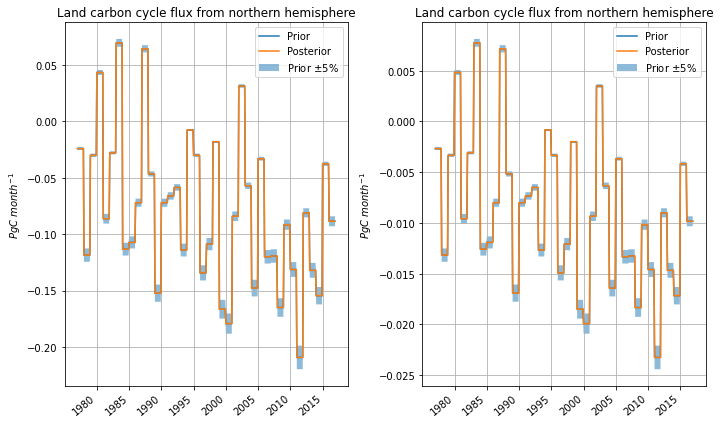

In [70]:
f, ax = subplots(1, 2, figsize=(10, 6))

f.autofmt_xdate()

ax_bio_nh, ax_bio_sh = ax

ci_CO2_nh = 0.05*priorFluxesCO2['co2']['nh']['bio'].reshape(1,-1)[0]/1e15

ax_bio_nh.plot(priorFluxesCO2['time'], priorFluxesCO2['co2']['nh']['bio']/1e15)
ax_bio_nh.plot(posteriorFluxesCO2['time'], posteriorFluxesCO2['co2']['nh']['bio']/1e15)

ax_bio_nh.fill_between(priorFluxesCO2['time'], (priorFluxesCO2['co2']['nh']['bio'].reshape(1,-1)[0]/1e15-ci_CO2_nh), 
                      (priorFluxesCO2['co2']['nh']['bio'].reshape(1,-1)[0]/1e15+ci_CO2_nh), alpha=.5)

ax_bio_nh.set_ylabel('$PgC$ $month^{-1}$')
ax_bio_nh.legend(['Prior', 'Posterior', 'Prior $\pm 5$%'])
ax_bio_nh.set_title('Land carbon cycle flux from northern hemisphere')
ax_bio_nh.grid()
ax_bio_nh.tick_params(axis='x', which='both', labelbottom=True, labelrotation=40)

ci_CO2_sh = 0.05*priorFluxesCO2['co2']['sh']['bio'].reshape(1,-1)[0]/1e15

ax_bio_sh.plot(priorFluxesCO2['time'], priorFluxesCO2['co2']['sh']['bio']/1e15)
ax_bio_sh.plot(posteriorFluxesCO2['time'], posteriorFluxesCO2['co2']['sh']['bio']/1e15)

ax_bio_sh.fill_between(priorFluxesCO2['time'], (priorFluxesCO2['co2']['sh']['bio'].reshape(1,-1)[0]/1e15-ci_CO2_sh), 
                      (priorFluxesCO2['co2']['sh']['bio'].reshape(1,-1)[0]/1e15+ci_CO2_sh), alpha=.5)

ax_bio_sh.set_ylabel('$PgC$ $month^{-1}$')
ax_bio_sh.legend(['Prior', 'Posterior', 'Prior $\pm 5$%'])
ax_bio_sh.set_title('Land carbon cycle flux from northern hemisphere')
ax_bio_sh.grid()
ax_bio_sh.tick_params(axis='x', which='both', labelbottom=True, labelrotation=40)


f.tight_layout()
f.show()

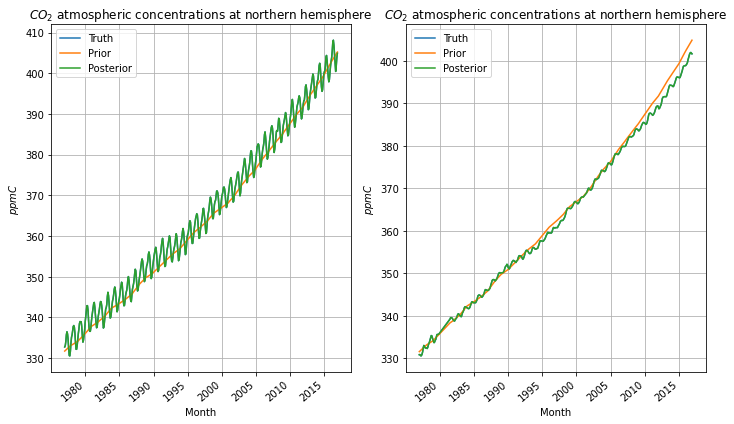

In [71]:
f, ax = subplots(1, 2, figsize=(10, 6))

f.autofmt_xdate()

ax_nh, ax_sh = ax

ax_nh.plot(trueObsCO2['co2']['nh']['time'], trueObsCO2['co2']['nh']['value']*1e6)
ax_nh.plot(concPriorCO2['co2']['nh']['time'], concPriorCO2['co2']['nh']['value']*1e6)
ax_nh.plot(concPosteriorCO2['co2']['nh']['time'], concPosteriorCO2['co2']['nh']['value']*1e6)
ax_nh.set_ylabel('$ppm C$')
ax_nh.set_xlabel('Month')
ax_nh.set_title('$CO_2$ atmospheric concentrations at northern hemisphere')
ax_nh.legend(['Truth', 'Prior', 'Posterior'])
ax_nh.grid()
ax_nh.tick_params(axis='x', which='both', labelbottom=True, labelrotation=40)

ax_sh.plot(trueObsCO2['co2']['sh']['time'], trueObsCO2['co2']['sh']['value']*1e6)
ax_sh.plot(concPriorCO2['co2']['sh']['time'], concPriorCO2['co2']['sh']['value']*1e6)
ax_sh.plot(concPosteriorCO2['co2']['sh']['time'], concPosteriorCO2['co2']['sh']['value']*1e6)
ax_sh.set_ylabel('$ppm C$')
ax_sh.set_xlabel('Month')
ax_sh.set_title('$CO_2$ atmospheric concentrations at northern hemisphere')
ax_sh.legend(['Truth', 'Prior', 'Posterior'])
ax_sh.grid()
ax_sh.tick_params(axis='x', which='both', labelbottom=True, labelrotation=40)

f.tight_layout()
f.show()

### 6. References<a class="anchor" id="Section_6"></a>

<div style="text-align: justify">
<ul>
    <li>Daniel J. Jacob, Lectures on Inverse Modeling, 2007. http://acmg.seas.harvard.edu/education/jacob_lectures_inverse_modeling.pdf</li>
    <li>Rayner, P. J., Michalak, A. M., & Chevallier, F. (2019). Fundamentals of data assimilation applied to biogeochemistry. Atmos. Chem. Phys., 19(22), 13911-13932. doi:10.5194/acp-19-13911-2019</li>
    <li>Rayner, P. J., Raupach, M. R., Paget, M., Peylin, P., & Koffi, E. (2010). A new global gridded data set of CO2 emissions from fossil fuel combustion: Methodology and evaluation. Journal of Geophysical Research: Atmospheres, 115(D19). doi:10.1029/2009JD013439</li>
    <li>Andrew, R., Andrews, O., Arora, V., Bakker, D., Barbero, L., Becker, M., Betts, R., Boden, T., Bopp, L., Canadell, J., Chevallier, F., Chini, L., Ciais, P., Cosca, C., Cross, J., Currie, K., Friedlingstein, P., Gasser, T., Harris, I., Hauck, J., Haverd, V., Houghton, R., Hunt, C., Hurtt, G., Ilyina, T., Jackson, R., Jain, A., Kato, E., Kautz, M., Keeling, R., Klein Goldewijk, K., Korsbakken, J., Körtzinger, A., Landschützer, P., Le Quéré, C., Lefèvre, N., Lenton, A., Lienert, S., Lima, I., Lombardozzi, D., Manning, A., Metzl, N., Millero, F., Monteiro, P., Munro, D., Nabel, J., Nakaoka, S., Nojiri, Y., Padín, X., Peregon, A., Peters, G., Pfeil, B., Pierrot, D., Pongratz, J., Poulter, B., Rehder, G., Reimer, J., Rödenbeck, C., Schwinger, J., Sitch, S., Skjelvan, I., Stocker, B., Séférian, R., Tans, P., Tian, H., Tilbrook, B., van der Laan-Luijkx, I., van der Werf, G., van Heuven, S., Viovy, N., Vuichard, N., Walker, A., Watson, A., Wiltshire, A., Zaehle, S., Zhu, D., GCP, 2019. Global Carbon Budget 2019, https://hdl.handle.net/11676/Z6S-dJJHB4RCe07mcmhMYxwx</li>
    <li>Dr. Pieter Tans, NOAA/GML (www.esrl.noaa.gov/gmd/ccgg/trends/) and Dr. Ralph Keeling, Scripps Institution of Oceanography (scrippsco2.ucsd.edu/).</li>
</ul> 
</div>
